### **Qualitative (Categorical ) Data Exploratory:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

***Create Orders Dataframe Depending On Wrang User-Defiend Function***

In [2]:
def wrang(
    dataframe,
    encoding = None,
    dropnanvalues = None,
    duplicatevlues = None,
    datecolumn = None,
    renamedcolumns = None  
):
    # Loading Data From CSV File:
    df = pd.read_csv(dataframe, encoding= encoding)

    # Drop Nan Value Of Specific Columns:
    df.dropna(subset=dropnanvalues, inplace=True)

    # Remove Duplicates From Specific Columns:
    df.drop_duplicates(subset=duplicatevlues, inplace=True)

    # Convert Date Column From Object to Datetime:
    df[datecolumn] = pd.to_datetime(df[datecolumn])

    # Rename Columns Names:
    df.rename(columns= renamedcolumns, inplace=True)

    # Stripe and Lowercase Columns Names:
    df.columns = df.columns.str.strip().str.lower()

    return(df)    

In [3]:
wrang(dataframe="Full_Join_Data.csv",
      encoding="ISO-8859-1",
      dropnanvalues=["OrderId"],
      duplicatevlues="OrderId",
      datecolumn="OrderDate", 
      renamedcolumns={"City.1":"SupplierCity", "Country.1":"SupplierCountry", "Phone.1":"SupplierPhone"}
      )

,customerid,firstname,lastname,city,country,phone,orderid,orderdate,ordernumber,totalamount,...,unitprice,package,isdiscontinued,supplierid,companyname,contactname,suppliercity,suppliercountry,supplierphone,fax
0,1.0,Maria,Anders,Berlin,Germany,030-0074321,396.0,2013-08-25,542773.0,1086.00,...,45.60,25 - 825 g cans,True,12.0,Plutzer Lebensmittelgro?m?rkte AG,Martin Bein,Frankfurt,Germany,(069) 992755,NaN
3,1.0,Maria,Anders,Berlin,Germany,030-0074321,445.0,2013-10-03,542822.0,878.00,...,43.90,15 - 625 g jars,False,7.0,"Pavlova, Ltd.",Ian Devling,Melbourne,Australia,(03) 444-2343,(03) 444-6588
4,1.0,Maria,Anders,Berlin,Germany,030-0074321,455.0,2013-10-13,542832.0,330.00,...,10.00,12 - 550 ml bottles,False,1.0,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
6,1.0,Maria,Anders,Berlin,Germany,030-0074321,764.0,2014-04-09,543141.0,960.00,...,13.25,24 pieces,False,27.0,Escargots Nouveaux,Marie Delamare,Montceau,France,85.57.00.07,NaN
8,1.0,Maria,Anders,Berlin,Germany,030-0074321,588.0,2014-01-15,542965.0,851.00,...,55.00,5 kg pkg.,False,28.0,Gai pâturage,Eliane Noz,Annecy,France,38.76.98.06,38.76.98.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,545.0,2013-12-23,542922.0,399.85,...,19.00,24 - 12 oz bottles,False,1.0,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222,NaN
2149,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,623.0,2014-02-04,543000.0,160.00,...,18.00,24 - 12 oz bottles,False,16.0,Bigfoot Breweries,Cheryl Saylor,Bend,USA,(503) 555-9931,NaN
2151,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,659.0,2014-02-25,543036.0,427.50,...,28.50,24 - 500 ml bottles,False,29.0,Forêts d'érables,Chantal Goulet,Ste-Hyacinthe,Canada,(514) 555-2955,(514) 555-2921
2152,91.0,Zbyszek,Piestrzeniewicz,Warszawa,Poland,(26) 642-7012,751.0,2014-04-03,543128.0,686.00,...,4.50,12 - 355 ml cans,True,10.0,Refrescos Americanas LTDA,Carlos Diaz,Sao Paulo,Brazil,(11) 555 4640,NaN


In [4]:
orders = wrang(dataframe="Full_Join_Data.csv",
               encoding="latin-1",
               dropnanvalues=["OrderId"],
               duplicatevlues="OrderId",
               datecolumn="OrderDate",
               renamedcolumns={"City.1":"SupplierCity", "Country.1":"SupplierCountry", "Phone.1":"SupplierPhone"})

In [5]:
columns_edit = ["customerid", "orderid", "ordernumber", "productid", "supplierid"]
for column in list(orders.columns):
    if column in columns_edit:
        orders[column] = orders[column].astype(int)

In [6]:
orders = orders[["customerid", "firstname", "lastname", "city", "country", "orderid", "ordernumber", "orderdate", "totalamount"]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2156
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    int64         
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    int64         
 6   ordernumber  830 non-null    int64         
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.8+ KB


***Exploratory Data Analysis (EDA):***

**1- Univariate Analysis Step:**

**1.2.Analysis Qualitative (Categorical) Column In The Data (city - country):**

**City Column Analysis Using Bar Chart:**

In [7]:
city_chart = (orders["city"].value_counts()).sort_values(ascending=False)
city_chart

city
London            46
Rio de Janeiro    34
Sao Paulo         31
Boise             31
Graz              30
                  ..
Vancouver          3
Kirkland           3
Butte              3
Walla Walla        2
Caracas            2
Name: count, Length: 69, dtype: int64

**1-Using Plot( ) Function of Pandas Library:**

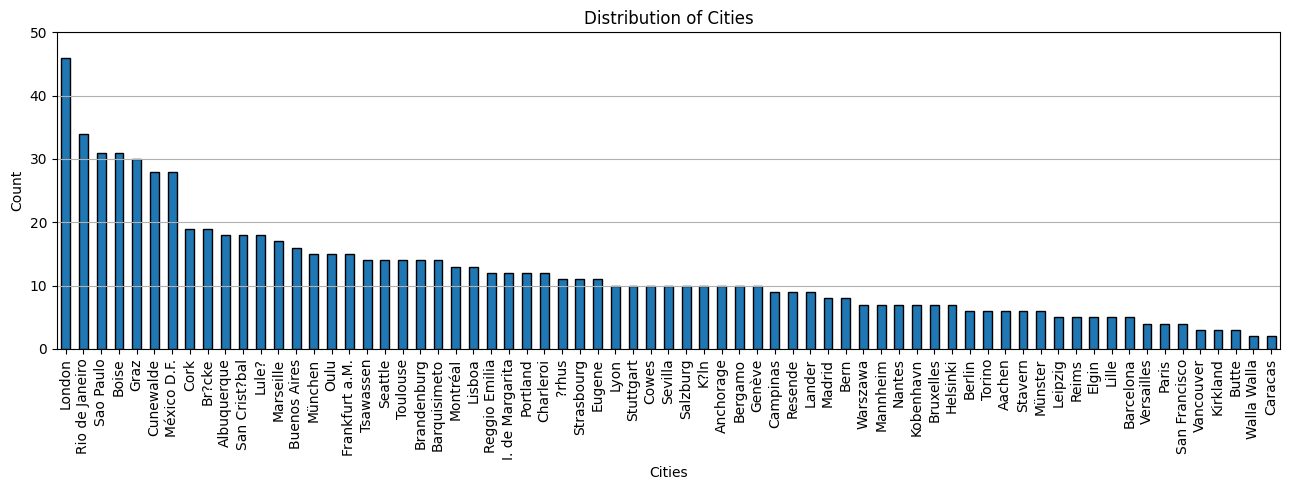

In [8]:
plt.figure(figsize=(13,5))
city_chart.plot(kind="bar", edgecolor="black")
plt.title("Distribution of Cities")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.ylim(0,50)
plt.grid(True, axis="y")
plt.tight_layout()

**2-Using Matplotlib Library:**

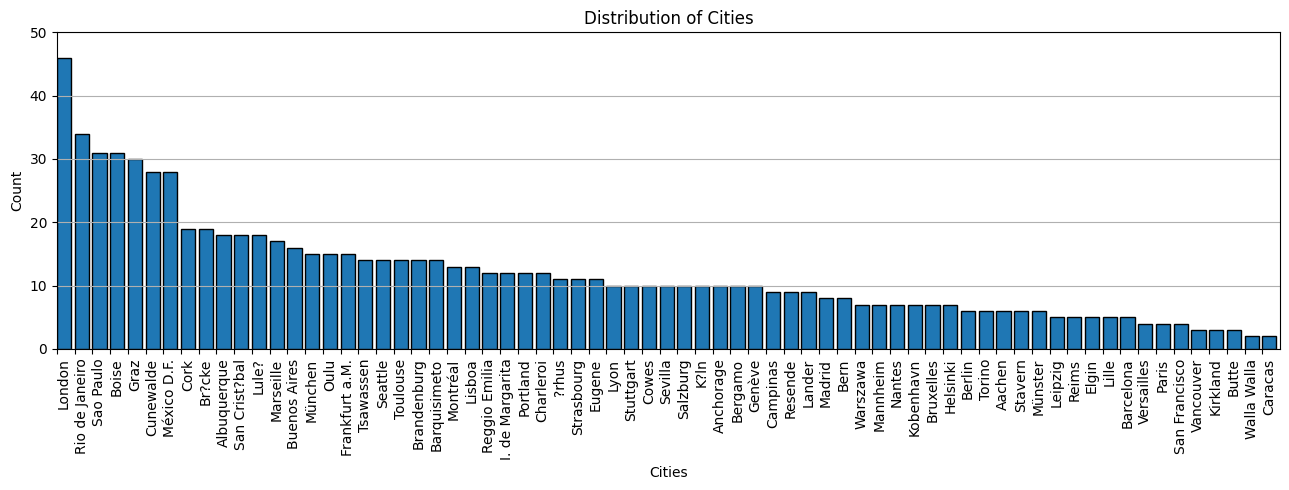

In [9]:
plt.figure(figsize=(13,5))
plt.bar(city_chart.index, city_chart.values, edgecolor='black', align="edge")
plt.title("Distribution of Cities")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.ylim(0,50)
plt.xlim(0,69)
plt.xticks(ha='left', rotation=90)
plt.grid(True, axis="y")
plt.tight_layout()

**3-Using Ploty Library:**

In [10]:
px.bar(data_frame=city_chart, title="Distribution of Cities")

**4-Using Seaborn Library:**

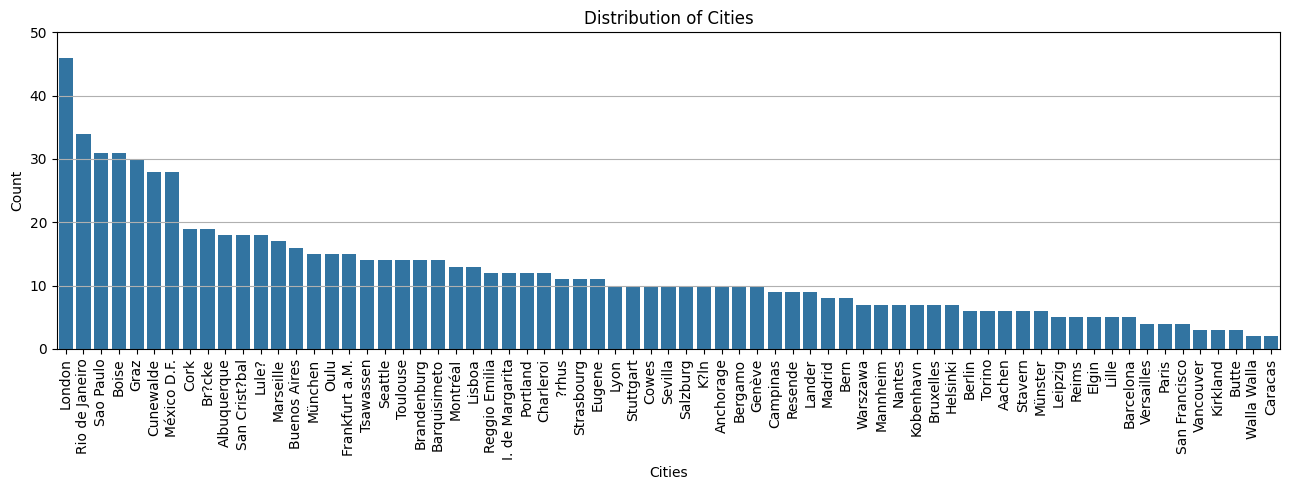

In [11]:
plt.figure(figsize=(13,5))
sns.barplot(x=city_chart.index, y=city_chart.values)
plt.title("Distribution of Cities")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.ylim(0,50)
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()

**Country Column Analysis Using Bar Chart:**

In [12]:
country_chart = (orders["country"].value_counts()).sort_values(ascending=False)
country_chart

country
Germany        122
USA            122
Brazil          83
France          77
UK              56
Venezuela       46
Austria         40
Sweden          37
Canada          30
Mexico          28
Italy           28
Spain           23
Finland         22
Belgium         19
Ireland         19
Switzerland     18
Denmark         18
Argentina       16
Portugal        13
Poland           7
Norway           6
Name: count, dtype: int64

**1.Using Seaborn Library:**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'France'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Venezuela'),
  Text(6, 0, 'Austria'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Finland'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'Ireland'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Argentina'),
  Text(18, 0, 'Portugal'),
  Text(19, 0, 'Poland'),
  Text(20, 0, 'Norway')])

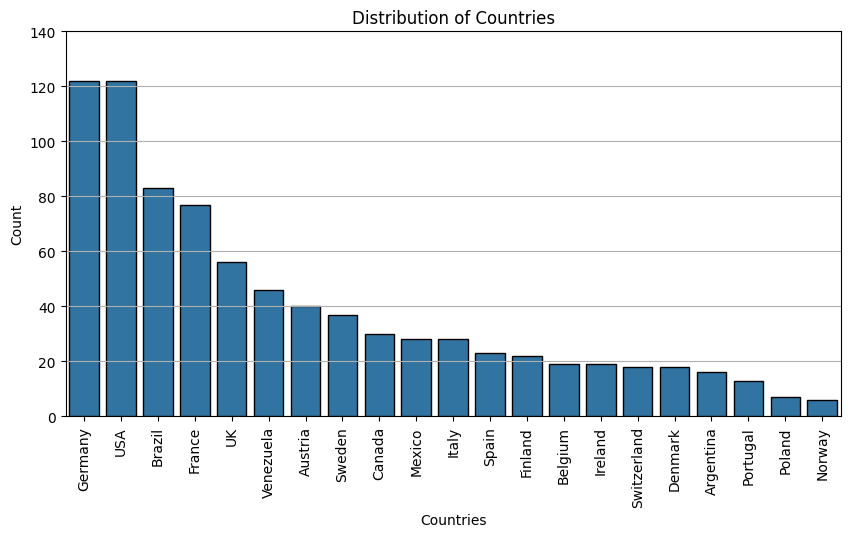

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=country_chart.index, y=country_chart.values, edgecolor="black")
plt.title("Distribution of Countries")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.grid(True, axis="y")
plt.ylim(0,140)
plt.xticks(rotation=90)

**2.Using Plotly Library:**

In [14]:
px.bar(data_frame=country_chart, title="Distribution of Countries")

**Country Column Analysis Using Pie Chart:**

**1-Using Plot( ) Function of Pandas Library:**

In [15]:
country_chart.loc["Others"] = (country_chart[country_chart.values < 18]).sum()

In [16]:
country_chart = country_chart[country_chart.values >= 18]
country_chart

country
Germany        122
USA            122
Brazil          83
France          77
UK              56
Venezuela       46
Austria         40
Sweden          37
Canada          30
Mexico          28
Italy           28
Spain           23
Finland         22
Belgium         19
Ireland         19
Switzerland     18
Denmark         18
Others          42
Name: count, dtype: int64

Text(455.1944444444444, 0.5, ' ')

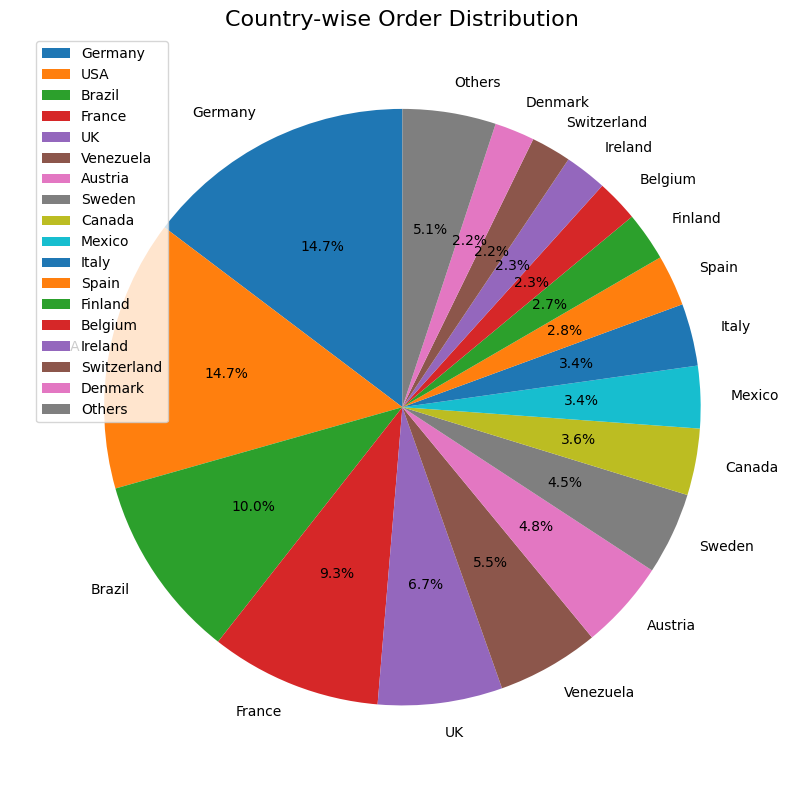

In [19]:
plt.figure(figsize=(15, 8))
country_chart.plot(
    kind="pie",
    startangle=90,
    autopct="%1.1f%%",
    legend=True,            
)
plt.title("Country-wise Order Distribution", fontsize=16)
plt.tight_layout()
plt.ylabel(" ")


**2- Using Plotly Library:**

In [18]:
px.pie(data_frame=orders, names="country", title="Distribution of Countries")

**Pie Chart Analysis:**

- Through the preliminary analysis, we see that London is the city that has the largest share of purchasing our products with 46 invoices, but Germany and United States are the the most purchasing countries for dataset products with 121 invoices and 14.7% of our total sales.
